# Clustering
<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/edit/main/demos/04_Clustering_with_KMeans.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The aim of clustering is to automatically find groups of similar datapoints in unlabeled data. In this exercise, your aim will be to implement the k-Means algorithm and apply it to a set of random data.



## Task Implement the KMeans algorithm

Input:

* A 2D array of features

* A number of groups (nGroups)

Output:

* A 1D array of estimated group membership for each point
* Coordinates of the cluster centers

### Step by Step guide to developing this algorithm:





1.  **Initialize** :
Start by initializing an array of 2D points called clusterCenters. It should have the length nGroups. You can initialize them however you want. The easiest starting point for now is to hardcode them (e.g., [0, 0]). Initialize a list of the same length as the featureArray called clusterAssignments to track cluster membership of each point. You can use the np.empty() function for this.



2. **Assign Points to Clusters**: Loop through each point and calculate the distance to every cluster center. You can define your own function using Pythagorean math or use the predefined metric of scikit-learn. Assign each point to its closest cluster by updating clusterAssignments at the respective index. Print the closest cluster center for each point as an intermediate result.



3. **Update Cluster Centers**: Recalculate all clusterCenters by averaging the coordinates of all the points in a given cluster. For example, if the 2 points in cluster one have the coordinates [1,1] and [2,2], the cluster center should have the updated coordinates [1.5, 1.5]. Print the updated cluster center coordinates as an intermediate result.


> Tipp: You can use `numpy.average` to easily average the coordinates by using the `axis` optional paramter




4. Repeat steps 2 and 3 for a fixed number of iterations (e.g. 25 times).

5. Return the clusterAssignments and clusterCenters.



**This is a very basic implementation of the kMeans algorithm.**


**Now use the clusterAssignments and clusterCenters variables to visualize your results.**

---


## Improvements
Next, try to improve it by adding some or all of the following:

* Try to think of a strategy to initialize the cluster centers more intelligently, instead of hardcoding the startpoints.
* Make the number of cluster centers dynamic (equal to nGroups)
* Visualize intermediate results (you could produce a GIF similar to the one in the presentation.)
* Choose a better strategy to stop the loop in point 4 (e.g. change the foor-loop for a while loop that ends when the cluster centers don't change (much) anymore)

* Optimal K: Try to implement a strategy to automatically choose an optimal number of clusters. Research-Tip: "Elbow Method"

[[ 4.35828442 -5.63905166]
 [ 9.61255784  5.07929544]
 [ 8.7337095   2.49162431]
 [ 8.80184697  4.82997269]
 [ 9.95926647  0.85665806]
 [ 8.31291402  5.4116051 ]
 [10.50478434  1.18730514]
 [ 8.67310212  5.63251722]
 [ 9.20982242  5.89341384]
 [ 3.19522403 -8.10366298]]
[2 1 0 1 0 1 0 1 1 2]


[]

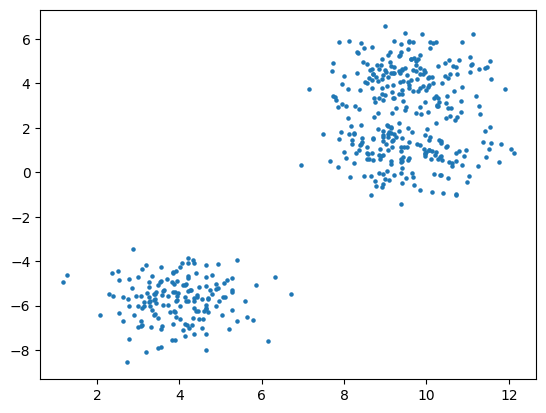

In [34]:
import seaborn as sns #for plotting
from sklearn.datasets import make_blobs #data generator

# automatically generate a random dataset with underlying clusters. You can play around with the parameters of this generator function to test your algorithm.
# true labels are the actual group a point belongs to. you can use them later to check the quality of your algorithm

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs
# automatically generate random dataset

features, true_labels = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1,
    random_state=4
)

print(features[:10])
print( true_labels[:10])
fig, ax = plt.subplots()
ax.scatter(x=features[:,0], y=features[:,1], s=5)
           #,c=true_labels)
plt.plot()




In [35]:
def k_means(featureArray, nGroups):
    # Array of 2D points clusterCenters random
    min_coords = np.min(featureArray, axis=0)
    max_coords = np.max(featureArray, axis=0)
    clusterCenters = np.random.uniform(min_coords, max_coords, size=(nGroups, featureArray.shape[1]))

    # ClusterAssignments, track membership
    clusterAssignments = np.empty(featureArray.shape[0], dtype=int)

    # calculate distance to every cluster center
    def calculateDistance(point, centers):
        distances = []
        for center in centers:
            distance = np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2)
            distances.append(distance)
        distances = np.array(distances)
        closestClusterCenter_index = np.argmin(distances)
        return closestClusterCenter_index

    # Update Cluster Centers Recalculate clusterCenters averaging coordinates
    def updateClusterCenter(featureArray, clusterAssignments, nGroups, clusterCenters):
        new_clusterCenters = np.empty((nGroups, featureArray.shape[1]), dtype=float)
        for i in range(nGroups):
            pointsInCluster = featureArray[clusterAssignments == i]
            if len(pointsInCluster) > 0:
                new_clusterCenters[i] = np.average(pointsInCluster, axis=0)
            else:
                new_clusterCenters[i] = clusterCenters[i]
        return new_clusterCenters

    max_iterations = 25
    for _ in range(max_iterations):
        for i, point in enumerate(featureArray):
            clusterAssignments[i] = calculateDistance(point, clusterCenters)
        new_centers = updateClusterCenter(featureArray, clusterAssignments, nGroups, clusterCenters)

        # Check for convergence
        if np.allclose(clusterCenters, new_centers):
            clusterCenters = new_centers
            break
        clusterCenters = new_centers

    return clusterAssignments, clusterCenters

In [36]:
# Cell 3: Generate Sample Data and Run K-Means

# Generate Sample Data
np.random.seed(42) # for reproducibility
features = np.concatenate([
    np.random.randn(100, 2) * 0.7 + np.array([0, 5]),
    np.random.randn(100, 2) * 0.7 + np.array([5, 0]),
    np.random.randn(100, 2) * 0.7 + np.array([5, 5]),
    np.random.randn(100, 2) * 0.7 + np.array([-3, -3])
])
n_groups = 4 # Example: 4 clusters for the generated data

# Run your k_means function
estimated_labels, clusterCenters = k_means(features, n_groups)

Displaying final K-Means results...


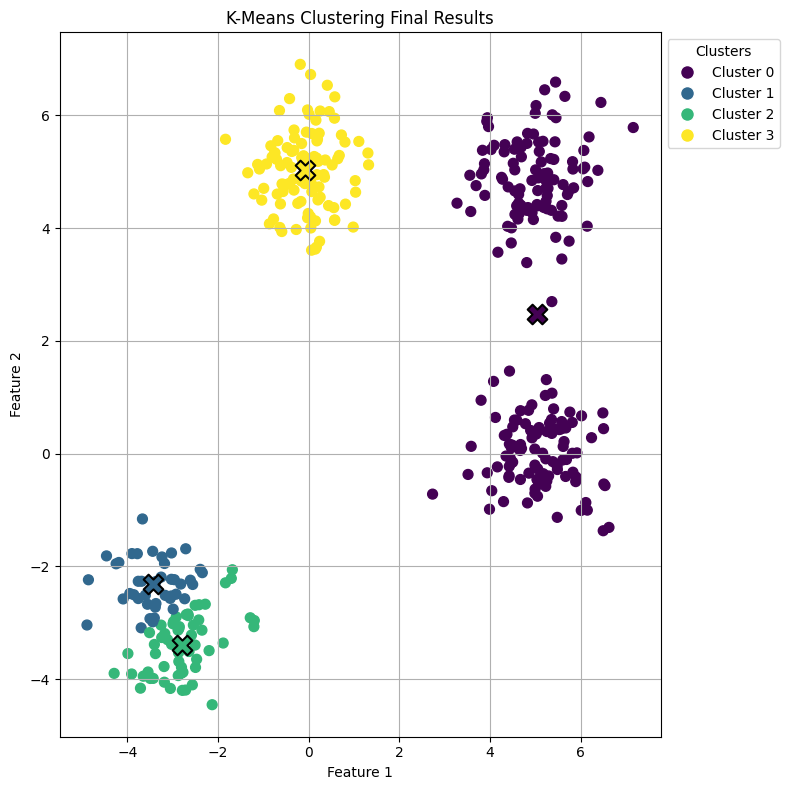

In [37]:
# Cell 4: Visualize Final K-Means Results

print("Displaying final K-Means results...")

fig, ax = plt.subplots(figsize=(8, 8))

# Get the colormap and normalize it for consistent coloring
cmap = plt.get_cmap('viridis', n_groups)

# Scatter plot of data points, colored by estimated cluster labels
scatter = ax.scatter(x=features[:,0], y=features[:,1], c=estimated_labels, s=50, cmap=cmap, label='Data Points')

# Plot the cluster centers
# We'll iterate through each cluster center and plot it with the same color as its assigned points
for i in range(n_groups):
    ax.scatter(x=clusterCenters[i,0], y=clusterCenters[i,1], c=[cmap(i)], s=200, marker='X', edgecolor='black', linewidth=1.5)

# Create a legend for the clusters
legend_handles = []
for i in range(n_groups):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=cmap(i), markersize=10,
                                     label=f'Cluster {i}'))

ax.legend(handles=legend_handles, title="Clusters", loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title('K-Means Clustering Final Results')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True)
plt.tight_layout() # Adjust layout to prevent legend overlap
plt.show()